# Hard-coding the gradient in deep learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [3]:
iris = datasets.load_iris()
X = iris.data
T = iris.target

C= len(set(list(T)))
F = X.shape[1]

In [4]:
x=X[0]
t=T[0]

So we loaded the  x s in variable X and the labels  t  in variable T. 
We also calculate the number of all possible classes C (in our case the classes are {0,1,2} so C=3) and the number of dimensions (features) in each datapoint F (in our case F=4). Now it's always a good idea to compute one term of the neg. log likelihood before we scale up to the whole thing. So let's define

In [5]:
W = np.random.randn(C,F)

It will be very convenient to store the weights of the model in a single array `W` which has `C` rows and `F` columns. Let's initialize it randomly.

In [6]:
p = np.exp(W @ x)
y = p/sum(p)

The matrix multiplication $W \mathbf{x}$ gives the linear activations, i.e. a vector with elements $\mathbf{w}_1^T \mathbf{x},\ldots,\mathbf{w}_C^T \mathbf{x}$ before they get passed to the soft-max function. The soft-max vector itself can be computed using

In [7]:
print(y)
print(sum(y))

[2.41194071e-01 4.83613545e-05 7.58757567e-01]
1.0


Let's verify that it is a probability distribution

In [8]:
L = - np.log(y[t])

Now the neg. log likelihood just for this datapoint can be defined as above

In [9]:
dW = np.zeros_like(W)

Let's now define a variable to hold the gradient of $L$ with respect to the weights, i.e. $\nabla_W L$ which we will initialize to zero. Note that it has exactly the same dimensions as $W$.

In [10]:
# According to the formula we derived above
for c in range(C): #we need to do is loop through the whole dataset, adding the gradients as we go along.
    dW[c] = (y[c] - 1) * x if c==t else y[c] * x #We will finally update the weights by adding a small negative multiple of the gradient, which is guaranteed to decrease the total neg. log likelihood by a small amount

It's also a good idea for sanity checking and general good practice, to produce some plot of the (hopefully) decreasing  L . Adding everything together we get the following:

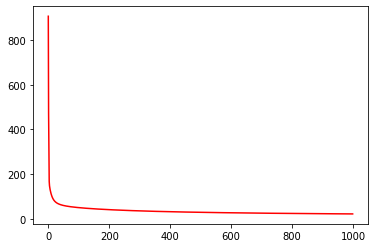

In [11]:
Ls=[] # this array will hold the neg. log likelihood as it decreases throughout 
# the algorithm
W = np.random.randn(C,F) # Our model weights, randomly initialized
alpha = 5e-4 # The learning rate
for e in range(1000): # We will perform 1000 steps of gradient descent
  dW = np.zeros_like(W) #initialize gradient to zero
  L=0 #initialize the neg.log likelihood sum
  for x,t in zip(X,T): #loop through dataset
    p = np.exp(W @ x) #soft-max
    y = p/sum(p) 
    L += -np.log(y[t]) #add neg. log. likelihood for datapoint
    for c in range(C):# compute gradient for datapoint
        dW[c] += (y[c] - 1) * x if c==t else y[c] * x    
  W -= alpha*dW # move weights in direction oposite to gradient
  Ls.append(L) # keep record of neg. log likelihood
plt.plot(Ls,'r-') # plot trajectory of L during gradient descent **V. IMPORTANT**

Seems that we managed to decrease something! Let's see if this corresponds to some accurate predictions

In [12]:
correct = 0
for x,t in zip(X,T):
  a_pred = W @ x
  correct += (a_pred.argmax() == t)
print(f'accuracy={correct/len(T)}')

accuracy=0.9733333333333334


That means that a pretty descent 97% of the class of all datapoints is correctly predicted by our model. (It's a pretty simple dataset after all)